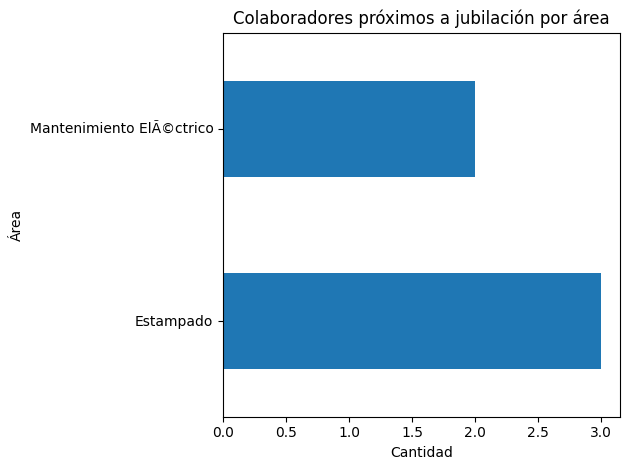

In [7]:
#Detectar riesgo por edad

import pandas as pd
import matplotlib.pyplot as plt

empleados = pd.read_excel('/content/empleados_mensual2.xlsx')

from datetime import datetime

empleados['fecha_nacimiento'] = pd.to_datetime(empleados['fecha_nacimiento'])

# Edad actual
empleados['edad'] = (
    (pd.Timestamp('today') - empleados['fecha_nacimiento'])
    .dt.days / 365
)

# Próximos a jubilarse (ej. +60)
riesgo = empleados[empleados['edad'] >= 60]

conteo = riesgo.groupby('area')['edad'].count().sort_values(ascending=False)

conteo.plot(kind='barh')
plt.title('Colaboradores próximos a jubilación por área')
plt.xlabel('Cantidad')
plt.ylabel('Área')
plt.tight_layout()
plt.savefig('jubilaciones_area.png')
plt.show()